In [52]:
import pandas as pd

In [53]:
from sqlite3 import connect

In [54]:
opsim_db = connect('baseline_v2.0_10yrs.db')

In [55]:
opsim_file = pd.read_sql('select * from observations limit 1000', opsim_db)

In [56]:
opsim_file.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'numExposures', 'airmass', 'seeingFwhm500', 'seeingFwhmEff',
       'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime', 'visitTime',
       'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth', 'paraAngle',
       'cloud', 'moonAlt', 'sunAlt', 'note', 'fieldId', 'proposalId',
       'block_id', 'observationStartLST', 'rotTelPos', 'moonAz', 'sunAz',
       'sunRA', 'sunDec', 'moonRA', 'moonDec', 'moonDistance', 'solarElong',
       'moonPhase', 'cummTelAz'],
      dtype='object')

In [57]:
'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD', 'fieldId', 'filter', 'fiveSigmaDepth'

('observationId',
 'fieldRA',
 'fieldDec',
 'observationStartMJD',
 'fieldId',
 'filter',
 'fiveSigmaDepth')

In [58]:
band_obs = pd.read_sql_query('SELECT observationId, fieldRA, fieldDec, observationStartMJD, fieldId, filter, fiveSigmaDepth FROM observations', opsim_db)

In [59]:
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth
0,0,310.024480,-60.812928,60218.001806,-1,y,22.370557
1,1,310.601871,-63.561425,60218.002254,-1,y,22.338327
2,2,311.292611,-66.317774,60218.002703,-1,y,22.295487
3,3,312.140731,-69.082666,60218.003152,-1,y,21.270421
4,4,304.170163,-73.375442,60218.003624,-1,y,21.205276
...,...,...,...,...,...,...,...
2086975,2086975,338.528926,-55.399555,63870.104267,-1,y,21.917628
2086976,2086976,347.380828,-54.922128,63870.104758,-1,y,21.864586
2086977,2086977,350.974688,-52.986827,63870.105219,-1,y,21.871581
2086978,2086978,356.062503,-53.778759,63870.105677,-1,y,21.850527


In [60]:
import matplotlib.pyplot as plt
%matplotlib Inline

Text(0, 0.5, 'DEC')

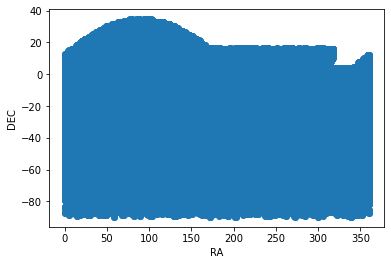

In [61]:
plt.scatter(band_obs['fieldRA'], band_obs['fieldDec'])
plt.xlabel('RA')
plt.ylabel('DEC')

In [62]:
import matplotlib as npl

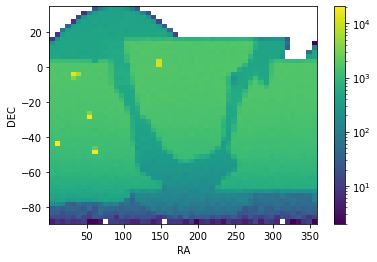

In [63]:
plt.hist2d(band_obs['fieldRA'], band_obs['fieldDec'], bins = 50, norm=npl.colors.LogNorm())
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

In [64]:
import numpy as np

In [65]:
find_max_RA = np.max(band_obs['fieldRA'])
find_min_RA = np.min(band_obs['fieldRA'])
find_max_DEC = np.max(band_obs['fieldDec'])
find_min_DEC = np.min(band_obs['fieldDec'])
num_bins = 50

In [66]:
RA_set = np.linspace(find_min_RA, find_max_RA, num_bins+1)
DEC_set = np.linspace(find_min_DEC, find_max_DEC, num_bins+1)

In [67]:
RA_bins = np.digitize(band_obs['fieldRA'], RA_set, right=True)
RA_bins

array([44, 44, 44, ..., 49, 50, 49])

In [68]:
DEC_bins = np.digitize(band_obs['fieldDec'], DEC_set, right=True)
DEC_bins

array([12, 11, 10, ..., 15, 15, 14])

In [69]:
band_obs['RABins'] = RA_bins
band_obs['DECBins'] = DEC_bins

In [70]:
new_field_id = (RA_bins-1) * 50 + DEC_bins
band_obs['fieldId'] = new_field_id
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins
0,0,310.024480,-60.812928,60218.001806,2162,y,22.370557,44,12
1,1,310.601871,-63.561425,60218.002254,2161,y,22.338327,44,11
2,2,311.292611,-66.317774,60218.002703,2160,y,22.295487,44,10
3,3,312.140731,-69.082666,60218.003152,2159,y,21.270421,44,9
4,4,304.170163,-73.375442,60218.003624,2107,y,21.205276,43,7
...,...,...,...,...,...,...,...,...,...
2086975,2086975,338.528926,-55.399555,63870.104267,2364,y,21.917628,48,14
2086976,2086976,347.380828,-54.922128,63870.104758,2415,y,21.864586,49,15
2086977,2086977,350.974688,-52.986827,63870.105219,2415,y,21.871581,49,15
2086978,2086978,356.062503,-53.778759,63870.105677,2465,y,21.850527,50,15


In [71]:
r_filter = band_obs.query('fieldId == 2403 and filter == "r"')
g_filter = band_obs.query('fieldId == 2403 and filter == "g"')
print(r_filter, g_filter)

         observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
772                772  349.857034 -82.633511         60218.357890     2403   
846124          846124  349.132762 -83.345848         61682.142242     2403   
860288          860288  349.770490 -84.147058         61703.077226     2403   
1680668        1680668  349.123067 -82.933787         63159.185750     2403   
1875208        1875208  346.865503 -83.230118         63536.152786     2403   

        filter  fiveSigmaDepth  RABins  DECBins  
772          r       22.115278      49        3  
846124       r       23.833470      49        3  
860288       r       23.336416      49        3  
1680668      r       23.423731      49        3  
1875208      r       23.918868      49        3            observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
1259256        1259256  351.795196 -83.451359         62442.066218     2403   
1478871        1478871  346.629750 -83.641666         62802.056051 

In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = '/home/jovyan/uw-premap-2022-photoz/data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [73]:
fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = '/home/jovyan/uw-premap-2022-photoz/data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [74]:
import rubin_sim.photUtils.Bandpass as Bandpass
import rubin_sim.photUtils.Sed as Sed

In [75]:
sun = Sed()
sun.readSED_flambda('/home/jovyan/uw-premap-2022-photoz/data/sed_templates/CWW_KINNEY/CWW_E_ext.sed')
sun.wavelen/=10

In [76]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']

lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].readThroughput(os.path.join(fdir, f'total_{f}.dat'))
    
mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])

# Make a dataframe just to get a nice output cell.
pd.DataFrame(mags, index=['Sun']).T

,Sun
u,-4.150003
g,-5.896804
r,-6.622219
i,-6.974888
z,-7.233845
y,-7.425142


In [77]:
r = 20.0

fluxNorm = sun.calcFluxNorm(r, lsst['r'])

sun.multiplyFluxNorm(fluxNorm)

mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])
    
pd.DataFrame(mags, index=['Distant Sun']).T

,Distant Sun
u,22.472216
g,20.725415
r,20.000000
i,19.647330
z,19.388374
y,19.197076


In [78]:
from rubin_sim.photUtils import SignalToNoise
from rubin_sim.photUtils import PhotometricParameters

In [79]:
SignalToNoise.calcMagError_m5(magnitude=20, bandpass=lsst['r'], m5=24, photParams=PhotometricParameters())
SignalToNoise.calcMagError_m5(magnitude=20.725415, bandpass=lsst['g'], m5=24, photParams=PhotometricParameters())

(0.013139422508835895, 0.03934261437469505)

In [80]:
mag_error_r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 22.115278, PhotometricParameters())
mag_error_2r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 23.833470, PhotometricParameters())
print(mag_error_r)
print(mag_error_2r)

0.031221444804164934
0.009322245115585407


In [81]:
mag_error_g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 23.803613 , PhotometricParameters())
mag_error_2g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 24.005959, PhotometricParameters())
print(mag_error_g, mag_error_2g)

0.014857161547721024 0.013093479367888855


In [82]:
mag_2 = 20
mag_1 = 20.725415
def combine_col_err(mag_1, mag_2, err_1, err_2):
    return mag_1-mag_2, np.sqrt(mag_error_g**2 + mag_error_r**2)

In [83]:
gmr_error = combine_col_err(mag_1, mag_2, mag_error_g, mag_error_r)

In [84]:
gmr_error

(0.7254150000000017, 0.0345762037377529)

In [95]:
from copy import copy
g_r = []
g_r_err = []
pdf_list = []
r = 24.5
for redshift in np.arange(0,3.1,0.1):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(redshift)
    mags = {}
    fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
    sun_copy.multiplyFluxNorm(fluxNorm)
    mags = {}
    for f in filterlist:
        mags[f] = sun_copy.calcMag(lsst[f])
        pd.DataFrame(mags, index=['Distant Sun']).T
    gr_color = mags['g'] - mags['r']
    gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
    pdf_list.append(norm(loc = gr_color, scale = gr_error))
    g_r.append(mags['g'] - mags['r'])
    mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], 23.803613 , PhotometricParameters())
    mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], 22.115278, PhotometricParameters())
    g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
    
    

print(g_r, g_r_err)

[0.7254152168005632, 0.9092875263745306, 1.21556563554606, 1.5101335745430582, 1.7336961338800663, 1.6247841723966872, 1.564944229071827, 1.6311809361247, 1.8812287964095908, 2.127568839165825, 2.2677011843884642, 2.1867075250048273, 1.8528072436778764, 1.4936730257263982, 1.1240496109998404, 0.8557468597614317, 0.7198391764086622, 0.7096387142844485, 0.747772632412822, 0.7750666481098385, 0.7663830025511693, 0.7227059844917534, 0.6590263915621257, 0.5962345500838815, 0.5445307149382153, 0.508888128898807, 0.4915751575070537, 0.4913180779593205, 0.5034478075371531, 0.5257928424279541, 0.5554684677789687] [1.2671476607381404, 1.3077948000368305, 1.393819183964462, 1.500235956268231, 1.5972065577364405, 1.5482105621614457, 1.522709331607012, 1.5509962136236233, 1.6688454209977568, 1.8015981164084949, 1.8841186665033087, 1.8358238191244365, 1.6545776846994644, 1.4936518602014357, 1.3655781774662794, 1.2951559621782334, 1.26603345029476, 1.2640125069440578, 1.2716829212329661, 1.2773683615

In [96]:
# g_r_err on x-axis, g_r on y-axis

Text(0, 0.5, 'Color')

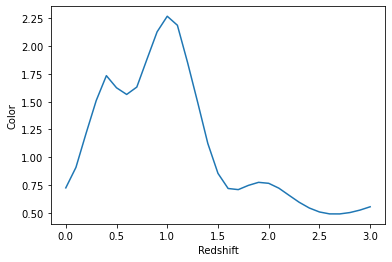

In [110]:
redshift_r = np.arange(0,3.1,0.1)
plt.plot(redshift_r, g_r)
plt.xlabel("Redshift")
plt.ylabel("Color")

In [111]:
from scipy.stats import norm

In [112]:
g_r[0], g_r_err[0]

(0.7254152168005632, 1.2671476607381404)

In [113]:
gal_z_0 = norm(loc=g_r[0], scale=g_r_err[0])
gal_z_0p5 = norm(loc=g_r[5], scale=g_r_err[5])
gal_z_1p0 = norm(loc=g_r[10], scale=g_r_err[10])

In [114]:
np.min(g_r), np.max(g_r)

(0.4913180779593205, 2.2677011843884642)

In [115]:
color_range = np.arange(-4,8, 0.01)

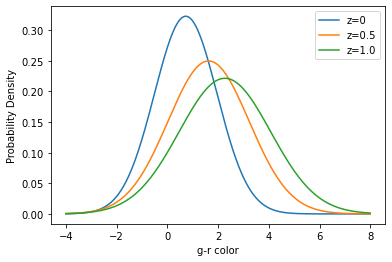

In [116]:
plt.plot(color_range, pdf_list[0].pdf(color_range), label = 'z=0')
plt.plot(color_range, pdf_list[5].pdf(color_range), label = 'z=0.5')
plt.plot(color_range, pdf_list[10].pdf(color_range), label = 'z=1.0')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

In [146]:
combined_pdf = np.zeros(len(color_range))
for galaxy in pdf_list:
    combined_pdf += galaxy.pdf(color_range)
combined_pdf = combined_pdf / 31

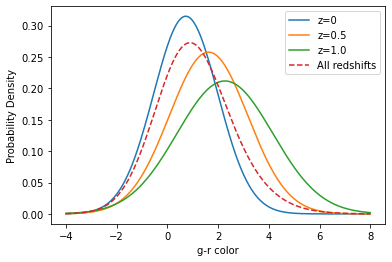

In [147]:
plt.plot(color_range, gal_z_0.pdf(color_range), label = 'z=0')
plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf, '--', label = 'All redshifts')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

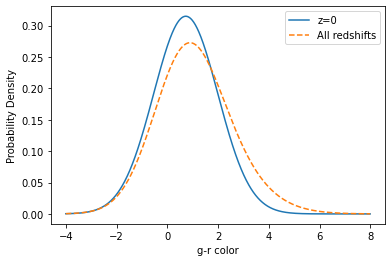

In [149]:
plt.plot(color_range, gal_z_0.pdf(color_range), label = 'z=0')
#plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
#plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf, '--', label = 'All redshifts')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

In [163]:
from scipy.special import kl_div, rel_entr
np.sum(0.01*gal_z_0.pdf(color_range))

0.9999054378812255

In [164]:
np.sum(kl_div(0.01*gal_z_0.pdf(color_range), 0.01*combined_pdf))

0.051175539786468376

In [165]:
kl_divergence = []
for galaxy in pdf_list:
    kl_divergence.append(np.sum(kl_div(0.01*galaxy.pdf(color_range), 0.01*combined_pdf)))
print(kl_divergence)

[0.05722931004130877, 0.032771841642770715, 0.02866388622344101, 0.05540805095939397, 0.09660895252163312, 0.06712945280885677, 0.05464354869642111, 0.06956702660294534, 0.13741541042637115, 0.2237948691999202, 0.2868930387611287, 0.2617952561055994, 0.14363143049028163, 0.04505606433686739, 0.006680940882723399, 0.02259741841634334, 0.04739742033212743, 0.05370427910765116, 0.0486489484742782, 0.04380196883145075, 0.04387426295834993, 0.05010604872575081, 0.06188744918413268, 0.07604830897127829, 0.08941025602983771, 0.09959987429790748, 0.10508659746068427, 0.10569806579403437, 0.10264614867223378, 0.09681377721648071, 0.08923564863857962]


In [185]:
print(r_filter['fiveSigmaDepth'])
print(g_filter['fiveSigmaDepth'])

print(1.25 * np.log10(np.sum(10.0 ** (0.8 * r_filter['fiveSigmaDepth']))))
print(1.25 * np.log10(np.sum(10.0 ** (0.8 * g_filter['fiveSigmaDepth']))))

772        22.115278
846124     23.833470
860288     23.336416
1680668    23.423731
1875208    23.918868
Name: fiveSigmaDepth, dtype: float64
1259256    24.005959
1478871    23.803613
1680618    23.770814
Name: fiveSigmaDepth, dtype: float64
24.444680387674623
24.466854221562045


In [190]:
from copy import copy
g_r = []
g_r_err = []
pdf_list = []
r = 24.5
for redshift in np.arange(0,3.1,0.1):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(redshift)
    mags = {}
    fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
    sun_copy.multiplyFluxNorm(fluxNorm)
    mags = {}
    for f in filterlist:
        mags[f] = sun_copy.calcMag(lsst[f])
        pd.DataFrame(mags, index=['Distant Sun']).T
    gr_color = mags['g'] - mags['r']
    gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
    pdf_list.append(norm(loc = gr_color, scale = gr_error))
    g_r.append(mags['g'] - mags['r'])
    mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], 24.466854221562045, PhotometricParameters())
    mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], 24.444680387674623, PhotometricParameters())
    g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
    
    

print(g_r, g_r_err)

[0.7254152168005632, 0.9092875263745306, 1.21556563554606, 1.5101335745430582, 1.7336961338800663, 1.6247841723966872, 1.564944229071827, 1.6311809361247, 1.8812287964095908, 2.127568839165825, 2.2677011843884642, 2.1867075250048273, 1.8528072436778764, 1.4936730257263982, 1.1240496109998404, 0.8557468597614317, 0.7198391764086622, 0.7096387142844485, 0.747772632412822, 0.7750666481098385, 0.7663830025511693, 0.7227059844917534, 0.6590263915621257, 0.5962345500838815, 0.5445307149382153, 0.508888128898807, 0.4915751575070537, 0.4913180779593205, 0.5034478075371531, 0.5257928424279541, 0.5554684677789687] [0.41982945529855176, 0.46880636273545284, 0.5672143322905607, 0.6827928974753288, 0.7846200282200531, 0.7334844711047271, 0.7066253818004171, 0.7364075459670827, 0.8585062123977024, 0.9935506488594374, 1.0767193423893164, 1.0280989667680123, 0.8438610074007439, 0.6757790343834338, 0.5355349503526275, 0.45378819735732756, 0.41845711583359857, 0.4159634584629582, 0.4253974729530458, 0.4

In [192]:
combined_pdf = np.zeros(len(color_range))
for galaxy in pdf_list:
    combined_pdf += galaxy.pdf(color_range)
combined_pdf = combined_pdf / 31

In [193]:
kl_divergence = []
for galaxy in pdf_list:
    kl_divergence.append(np.sum(kl_div(0.01*galaxy.pdf(color_range), 0.01*combined_pdf)))
print(kl_divergence)

[0.2745041039721471, 0.23275160765952213, 0.3259146629546191, 0.4143719730847684, 0.4679803123807885, 0.3008713863623954, 0.2887949138072354, 0.35899272168625784, 0.5507846904023053, 0.7013383207582169, 0.7873948118034897, 0.6897653726139178, 0.40895523234165787, 0.2012469612077913, 0.10251852829868374, 0.13173433473743784, 0.2065384365547446, 0.2378956331824415, 0.23000422910083768, 0.21609879224064646, 0.21084411673492706, 0.22338852753645216, 0.25904195915364353, 0.3113929919618612, 0.36726855943355213, 0.41364303124810714, 0.44028725254080636, 0.4442348525367167, 0.43072640100936044, 0.4047970091263495, 0.37220947469602383]


In [194]:
np.mean(kl_divergence)

0.3550416516492808

In [198]:
def combine_fiveSigmaDepth(fiveSigmaDepth):
    for Depth in fiveSigmaDepth:
        fiveSigmaDepth_r = 1.25 * np.log10(np.sum(10.0 ** (0.8 * r_filter['fiveSigmaDepth'])))
        fiveSigmaDepth_g = 1.25 * np.log10(np.sum(10.0 ** (0.8 * g_filter['fiveSigmaDepth'])))

In [199]:
def combine_pdfs(pdf_list_in):
    combined_pdf = np.zeros(len(color_range_in))
    for galaxy in pdf_list_in:
        combined_pdf += galaxy.pdf(color_range_in)
    combined_pdf = combined_pdf / 31
    return combined_pdf